In [27]:
import torch 
from smartem.offline.train_mb_error_detector.NNtools import UNet as UNet_offline
from smartem.online.models.UNet import UNet as UNet_online
import matplotlib.pyplot as plt
import numpy as np

In [30]:
weights_path = "/home/tommy-local/projects/smartem/SmartEM/pretrained_models/em2mb_best_core.pth"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

em2mb_net = UNet_online(1, 2)
em2mb_net.load_state_dict(torch.load(weights_path))
em2mb_net.eval()
em2mb_net.to(device)

UNet(
  (inc): DoubleConv(
    (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
  )
  (down1): Down(
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (dc): DoubleConv(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

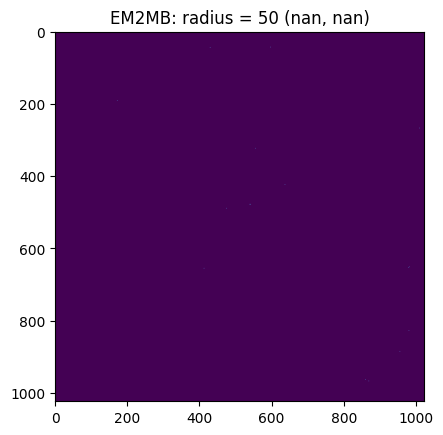

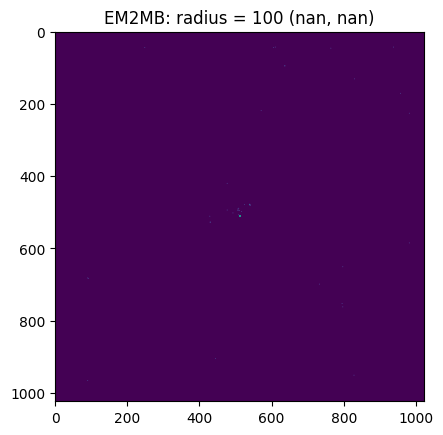

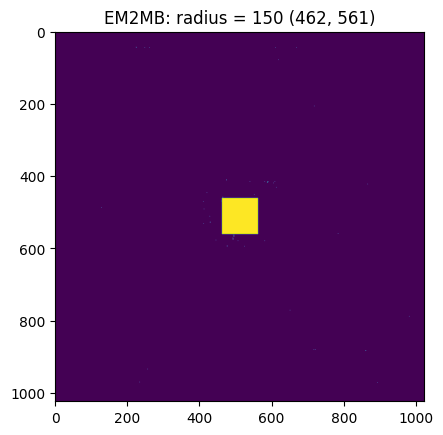

In [31]:
im_ref = torch.randn((1, 1, 1024, 1024), device=device, dtype=torch.float32)
out_ref = em2mb_net(im_ref).cpu().detach().numpy()
out_ref = np.squeeze(out_ref[0,0,:,:])

for r in range(50, 200, 50):
    im_rand = torch.randn((1, 1, 1024, 1024), device=device, dtype=torch.float32)
    im_rand[:,:,512-r:512+r,512-r:512+r] = im_ref[:,:,512-r:512+r,512-r:512+r]
    out_rand = em2mb_net(im_rand).cpu().detach().numpy()
    out_rand = np.squeeze(out_rand[0,0,:,:])

    if r > 100:
        sum = np.sum(out_ref == out_rand, axis=0)
        equal_idxs = np.where(sum > 20)[0]
    else:
        equal_idxs = [np.nan, np.nan]

    plt.imshow(out_ref == out_rand)
    plt.title(f"EM2MB: radius = {r} {(equal_idxs[0], equal_idxs[-1])}")
    plt.show()


